In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

import glob
import pandas as pd


In [2]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

def abrir_reguly(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[1:]
    enlaces = []
    for linea in data:
      enlaces.append(linea[:2])
    return(enlaces)

In [120]:
Data_Y2H = abrir_txt('TC03_data/yeast_Y2H.txt')
Data_APMS = abrir_txt('TC03_data/yeast_AP-MS.txt')
Data_LIT = abrir_txt('TC03_data/yeast_LIT.txt')
Data_LIT_Reguly = abrir_reguly('TC03_data/yeast_LIT_Reguly.txt')


Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)
Red_APMS=nx.Graph()
Red_APMS.add_edges_from(Data_APMS)
Red_LIT=nx.Graph()
Red_LIT.add_edges_from(Data_LIT)
Red_LIT_Reguly=nx.Graph()
Red_LIT_Reguly.add_edges_from(Data_LIT_Reguly)

redes_lista = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]

In [121]:
Data_esenciales = abrir_txt('TC03_data/Essential_ORFs_paperHe.txt')
print(Data_esenciales)

def abrir_esenciales(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[2:]
    esenciales = []
    for linea in data:
      if len(linea)>2:
        esenciales.append(linea[1])
    return(esenciales)

lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')
print (lista_esenciales)

[['rec_num', 'ORF_name', 'deletion_alias', 'gene_names', 'UPTAG_sequence_20mer', 'DNTAG_sequence_20mer'], ['=====', '=========', '==============', '=====================================================', '====================', '===================='], ['20406', 'YAL001C', 'TSV115,', 'FUN24', 'ACTATATGTGAAGGCATGGC'], ['20404', 'YAL003W', 'TEF5', 'GACATATCAGCATACATGGC'], ['20383', 'YAL025C', 'TGCCGCATCAAAGAGGCCAA'], ['20376', 'YAL032C', 'FUN20', 'TGATCCGCGTCGATGCTCTT'], ['20375', 'YAL033W', 'FUN53', 'CTGACTTAGTGCATACTGCT'], ['20372', 'YAL034W-a', 'NSL2,', 'DSN3', 'GGACCTCTGCTCATTATGCT'], ['20373', 'YAL035C-A', 'ATTGGTCACTCTGCACTGCT'], ['20368', 'YAL038W', 'PYK1', 'ATTGAGAGTCAGTGCCAGAT'], ['20365', 'YAL041W', 'CLS4', 'TATGGACTGGCATCACCGTG'], ['20362', 'YAL043C', 'FUN39', 'AGTCCATGCAGCACTCTTGG'], ['20409', 'YAR007C', 'RPA1,', 'FUN3,', 'BUF2', 'GCAGTGCGTGAACCTCTATC'], ['20410', 'YAR008W', 'FUN4', 'CATGAGAGTGAAGCAGTATC'], ['20416', 'YAR019C', 'LYT1', 'GCGCTTATCACATTTGACAG'], ['23028', 'YBL0

In [122]:
def segundo_elemento(lista):
  return lista[1]

def hacer_lista_grados_ordenada(Red):
  grados = Red.degree()
  grados = list(grados)
  grados.sort(key = segundo_elemento, reverse = True)
  return [nodo for (nodo,grado) in grados]

def ordenar_diccionario_por_valor(diccionario):
  return [key for key, value in sorted(diccionario.items(), key=lambda item: item[1], reverse=True)]

def armar_componente_gigante(Red):
  Conjunto_nodos_en_gigante = max(nx.connected_components(Red), key=len)
  Componente_Gigante = Red.subgraph(Conjunto_nodos_en_gigante).copy()
  return Componente_Gigante

In [123]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]


In [124]:
# Quiero armar la tabla 1 de Zotenko: Number of nodes, Number of edges, Average degree, Average clustering coefficient, para cada red

def elementos_tabla(Red):
	# Me quedo solo con la componente gigante
	Red_gigante = armar_componente_gigante(Red)

	nodos = Red_gigante.number_of_nodes()
	enlaces = Red_gigante.number_of_edges()
	promedio_grados = np.mean([grado for (nodo,grado) in list(Red_gigante.degree())])
	clustering = nx.average_clustering(Red_gigante)
	
	return (nodos,enlaces,promedio_grados,clustering)

tabla1 = pd.DataFrame(columns = ['Red', 'Nodos', 'Enlaces', 'Grado promedio', 'Coeficiente de clustering'])
for red in redes_lista:
	nodos, enlaces, promedio_grados, clustering = elementos_tabla(red)
	df = pd.DataFrame({'Red' : retrieve_name(red), 'Nodos' : nodos, 'Enlaces' : enlaces, 
										   'Grado promedio' : promedio_grados, 'Coeficiente de clustering' : clustering}, index=[0])
	tabla1 = pd.concat([tabla1, df])

tabla1 = tabla1.reset_index(drop=True)
tabla1



C:\Users\arell\AppData\Local\Temp\ipykernel_984\2303736355.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla1 = pd.concat([tabla1, df])


,Red,Nodos,Enlaces,Grado promedio,Coeficiente de clustering
0,Red_Y2H,1647,2682,3.256831,0.056600
1,Red_APMS,1004,8319,16.571713,0.647514
2,Red_LIT,1213,2621,4.321517,0.327861
3,Red_LIT_Reguly,3224,11789,7.313275,0.265685


In [8]:
# Quiero armar la tabla 2 de Zotenko, donde se muestre el overlap entre las redes

overlap = []
for i in range(len(redes_lista)):
	Red1 = redes_lista[i]
	edges_1 = set(Red1.edges())

	for j in range(len(redes_lista)):

		if i !=j :
			Red2 = redes_lista[j]
			edges_2 = set(Red2.edges())
		
			intersecting_edges = edges_1 & edges_2
			# print(intersecting_edges)
			valor = len(intersecting_edges)/Red1.number_of_edges()
			overlap.append(round(valor,3))

		if i == j:
			overlap.append(retrieve_name(redes_lista[i]))

lista = np.array(overlap).reshape(4,4)
pd.DataFrame(lista)

,0,1,2,3
0,Red_Y2H,0.06,0.053,0.09
1,0.019,Red_APMS,0.084,0.145
2,0.053,0.259,Red_LIT,0.619
3,0.022,0.111,0.153,Red_LIT_Reguly


In [9]:
def calcular_fraccion_esenciales(Red,lista_esenciales):
  proporcion_hubs = np.linspace(0.001, 1, 5000) ## achico la fraccion minima para que pueda explorar todo el espacio
  orden_grados = hacer_lista_grados_ordenada(Red)
  fraccion_hubs_esenciales = []
  for proporcion in proporcion_hubs:
    cantidad_hubs = int(len(Red.nodes())*proporcion)
    hubs_esenciales = set(orden_grados[:cantidad_hubs]).intersection(lista_esenciales)
    fraccion_hubs_esenciales.append(len(hubs_esenciales)/cantidad_hubs)
  return (proporcion_hubs,fraccion_hubs_esenciales)

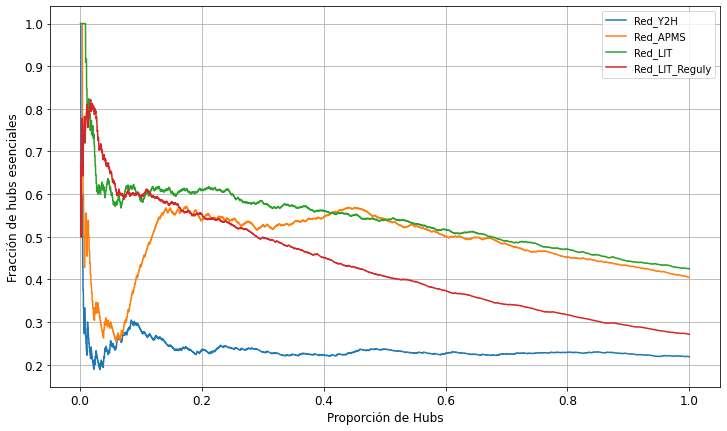

In [10]:
# Quiero armar la figura 1 de Zotenko, donde se muestra la fracción de hubs esenciales en función de la fracción de hubs
lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')

plt.figure(figsize=(12,7))
plt.xlabel('Proporción de Hubs', fontsize = 12)
plt.ylabel('Fracción de hubs esenciales', fontsize = 12)
plt.tick_params(labelsize = 12) #Ancho de los numeros de los ejes 

plt.grid('True')

# labels = ['Y2H', ' LIT', 'LIT Reg', 'AP-MS']
for i in range(len(redes_lista)):

	Red = redes_lista[i]
	Red_gigante= armar_componente_gigante(Red)
	hubs, fraccion = calcular_fraccion_esenciales(Red_gigante, lista_esenciales)

	plt.plot(hubs, fraccion, label = retrieve_name(redes_lista[i]))
	plt.legend()

{'A': 10, 'B': 11, 'C': 14, 'D': 10, 'E': 10, 'F': 9, 'G': 10, 'H': 12, 'I': 10, 'J': 8, 'K': 9, 'L': 7, 'M': 14, 'N': 15, 'O': 11, 'P': 10, 'Q': 10, 'R': 13, 'S': 11, 'T': 14, 'U': 10, 'V': 13, 'W': 6, 'X': 11, 'Y': 8, 'Z': 10, '[': 12, '\\': 11, ']': 11, '^': 8, '_': 10, '`': 10, 'a': 14, 'b': 12, 'c': 8, 'd': 15, 'e': 14, 'f': 14, 'g': 15, 'h': 16, 'i': 16, 'j': 11, 'k': 8, 'l': 5, 'm': 11, 'n': 12, 'o': 13, 'p': 8, 'q': 9, 'r': 13}


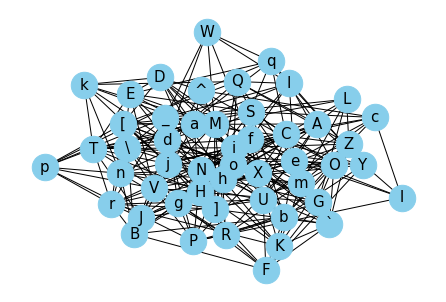

In [11]:
# Red de juguete para hacer pruebas, 20 nodos con enlaces aleatorios
G = nx.erdos_renyi_graph(50, 0.2)

mapping = {i: chr(65 + i) for i in range(len(G.nodes()))}
G = nx.relabel_nodes(G, mapping)

# Verifico los grados de los nodos
print(dict(G.degree()))

nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_color='black')
plt.show()

In [12]:
# Quiero armar la figura 3 de Zotenko, donde veo como se muere la componente gigante al ir sacando nodos

def desarmar_red(Red,funcion_sacar, fraccion_inicial = 0.5, plot = False, plot_desarme = False):
	componente_gigante = armar_componente_gigante(Red)
	tamano_inicial = len(componente_gigante.nodes())
	if plot == True:
		plt.figure()
		nx.draw(componente_gigante, node_size=10, linewidths = 0.1, node_color='skyblue', font_size=15, font_color='black')

	fraccion_quitados = []
	lista_fraccion_restante = []

	i = 1
	while i<tamano_inicial*fraccion_inicial:
		# print(tamano_inicial)
		# print(i)
		try:
			# Tomamos el nodo a sacar usando la funcion pasada
			fraccion_restante = (len(componente_gigante.nodes())/tamano_inicial)
			# print(fraccion_restante)
			nodo_sacar = funcion_sacar(componente_gigante)
			# print(nodo_sacar)
			# Lo sacamos
			componente_gigante.remove_node(nodo_sacar)
			# Nos quedamos con la nueva componente gigante
			componente_gigante = armar_componente_gigante(componente_gigante)
			if plot_desarme:
				plt.figure()
				nx.draw(componente_gigante, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_color='black')
			# Guardamos la fracción que queda
			
			lista_fraccion_restante.append(fraccion_restante)
			# Guardamos la fracción que ya sacamos
			fraccion_quitados.append(i/tamano_inicial)
			comp_out = componente_gigante.copy()

			# print(i)
			
			i=i+1
		except:

			break

	return (fraccion_quitados,lista_fraccion_restante, comp_out)

In [13]:
#Voy a armar la función que saca el nodo de mayor grado
def sacar_grado(Red):
	grados = Red.degree()
	grados = list(grados)
	grados.sort(key = segundo_elemento, reverse = True)
	return grados[0][0]

#Voy a armar la función que saca nodos de a uno tomandolos de forma aleatoria
def sacar_aleatorio(Red):
	nodos = list(Red.nodes())
	nodo = random.choice(nodos)
	return nodo

#Voy a armar la función que saca nodos segun su centralidad de cercanía
def sacar_cercania(Red):
	diccionario_centralidad_cercania = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)
	nodo = max(diccionario_centralidad_cercania, key=diccionario_centralidad_cercania.get)
	return nodo

#Ahora voy a hacer la funcion que saca nodos segun su betweenness
def sacar_betweenness(Red):
	diccionario_betweenness = nx.betweenness_centrality(Red)
	nodo = max(diccionario_betweenness, key=diccionario_betweenness.get)
	return nodo

# Por ultimo voy a hacer la funcion que saca nodos segun su centralidad de autovalor
def sacar_autovalor(Red):
	diccionario_centralidad_autovalor = nx.eigenvector_centrality(Red, max_iter=5000, tol=1e-06, nstart=None, weight='weight')
	nodo = max(diccionario_centralidad_autovalor, key=diccionario_centralidad_autovalor.get)
	return nodo

In [59]:
def graficoDesarmar(Red, lista_metodos, saveplot = False, **kwargs):
	quitados = np.zeros(len(lista_metodos), dtype = object)
	restantes = np.zeros(len(lista_metodos), dtype = object)
	plt.figure(**kwargs)
	for i in range(len(lista_metodos)):

		print('***** ', str(lista_metodos[i].__name__), '*****')

		salida = desarmar_red(Red, lista_metodos[i], 0.8)
		quitados[i] = salida[0]
		restantes[i] = salida[1]
		plt.plot(salida[0], salida[1], label = str((lista_metodos[i]).__name__[6:]))
		
	plt.legend() 
	if saveplot:
		plt.savefig('Desarme.png', dpi = 300)
	return (quitados, restantes)

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


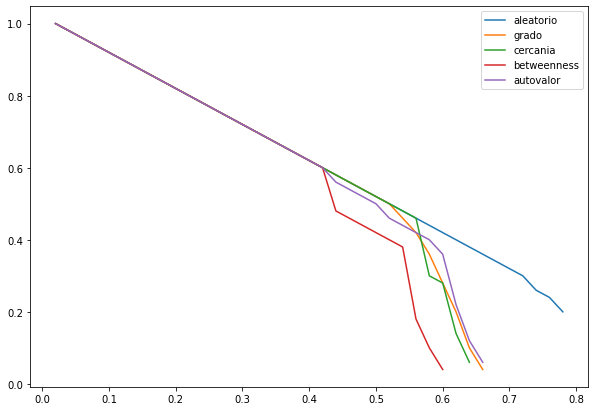

In [58]:
#Prueba con una red de juguete
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor] 
output = graficoDesarmar(G, lista_metodos, figsize = (10,7));

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


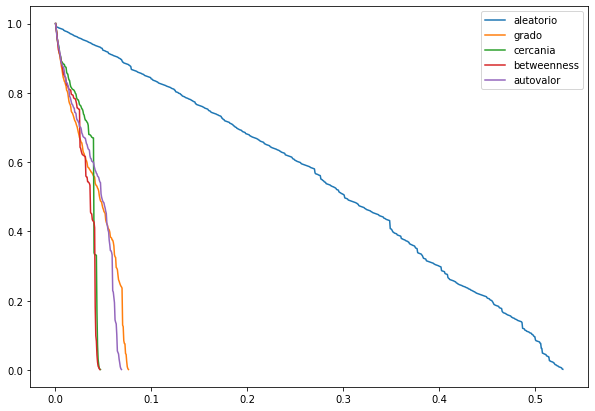

In [60]:
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor]
output = graficoDesarmar(Red_Y2H, lista_metodos, figsize = (10,7));

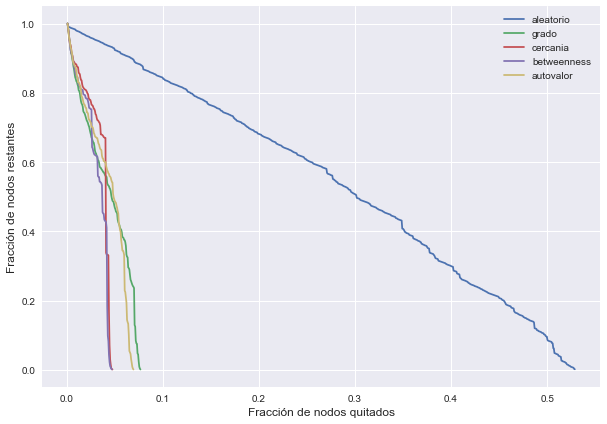

In [66]:
plt.figure(figsize=(10,7))
for i in range(len(output[0])):
    plt.style.use('seaborn')
    plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
    plt.legend()
    plt.xlabel('Fracción de nodos quitados', fontsize = 12)
    plt.ylabel('Fracción de nodos restantes', fontsize = 12)

In [184]:
# Voy a hacer la tabla 3 de Zotenko, donde veo la fraccion de nodos restantes en la componente gigante luego de eliminar los nodos escenciales y N nodos aleatorios
def sacar_esenciales(Red,lista_esenciales):
	Red2 = Red.copy()
	Red2.remove_nodes_from(lista_esenciales)
	return Red2

def eliminar_aleatorio(Red, lista_esenciales):
	Red_copy = Red.copy()
	for nodo in lista_esenciales:
		try:
			# print(nodo)
			grado = Red_copy.degree(nodo)
			nodos_mismo_grado = [n for n in Red_copy.nodes() if Red_copy.degree(n) == grado]
			# print(nodos_mismo_grado)
			rand = random.choice(nodos_mismo_grado)
			# print('++', rand)
			Red_copy.remove_node(rand)
		except:
			pass
	return Red_copy

In [186]:
# Armo la tabla 3, hago un dataframe de pandas con lo mismo de antes

def elementos_tabla3(Red, lista_esenciales):
	Red_sin_esenciales = sacar_esenciales(Red, lista_esenciales)
	Red_gigante = armar_componente_gigante(Red_sin_esenciales)

	nodos = Red_gigante.number_of_nodes()
	fraccion_sin_esenciales = nodos/Red.number_of_nodes()

	fraccion_aleatoria = eliminar_aleatorio(Red, lista_esenciales).number_of_nodes()/Red.number_of_nodes()
	
	return (fraccion_sin_esenciales, fraccion_aleatoria)

In [188]:
lista_redes = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]
tabla3 = pd.DataFrame(columns = ['Red', 'Fracción sin esenciales', 'Fracción aleatoria'])

for red in lista_redes:
	print(retrieve_name(red))
	fraccion_sin_esenciales, fraccion_aleatoria = elementos_tabla3(red, lista_esenciales)
	df = pd.DataFrame({'Red' : retrieve_name(red), 'Fracción sin esenciales' : fraccion_sin_esenciales, 'Fracción aleatoria' : fraccion_aleatoria}, index=[0])
	tabla3 = pd.concat([tabla3, df])

tabla3 = tabla3.reset_index(drop=True)

C:\Users\arell\AppData\Local\Temp\ipykernel_984\3471725465.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla3 = pd.concat([tabla3, df])


In [189]:
tabla3

,Red,Fracción sin esenciales,Fracción aleatoria
0,Red_Y2H,0.509415,0.790882
1,Red_APMS,0.200370,0.680025
2,Red_LIT,0.222005,0.660156
3,Red_LIT_Reguly,0.560629,0.759298
